# Group -02
## Group Members

   * **MD Shafiqul Islam (Leader) -> 21190201181**
   * Kazi Imon Hossain            -> 21190201183
   * Ali Hyder                    -> 21190201171
   * Al Muine                     -> 21190201176
   * Sheratul Mostakim            -> 21190201146

# Stroke Data Collection using Macing Learning
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

## Objectives
We will try to build a machine learning model to accurately predict whether stroke rate is high by the value of varius attribute calculations.

><font color=black>__Methods Used__</font>

        -Correlation Matrix
        -Decision Tree
        -Data Analysis and Visualization
        -Confusion Matrix
        -Histograph

><font color=black>__Technologies/Libraries Used__</font>

        1.Python 3
        2.Pandas
        3.NumPy
        4.Seaborn
        5.Scikit-learn
        6.Matplotlib
        7.Colab

><font color=black>__Dataset Name:__</font>

        - stroke-data.csv

# Attribute Information

**1) id:** unique identifier

**2) gender:** "Male", "Female" or "Other"

**3) age:** age of the patient

**4) hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

**5) heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

**6) ever_married:** "No" or "Yes"

**7) work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

**8) Residence_type:** "Rural" or "Urban"

**9) avg_glucose_level:** average glucose level in blood

**10) bmi:** body mass index

**11) smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*

**12) stroke:** 1 if the patient had a stroke or 0 if not

**Number of Observation Units: 5110**

**Variable Number: 11**

**GitHub Link**: [Stroke Data-Machine-Learning](https://github.com/Shafiqbd/Stroke-Data-Calculation-in-Machine-Learning)


# Import Libraries and Load Data set

In [1]:
#Installation of required libraries
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore") 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Reading the dataset
df = pd.read_csv("/content/stroke.csv")

In [5]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [4]:
df.shape

(5110, 11)

In [7]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Analysis data by using graph

## Histogram

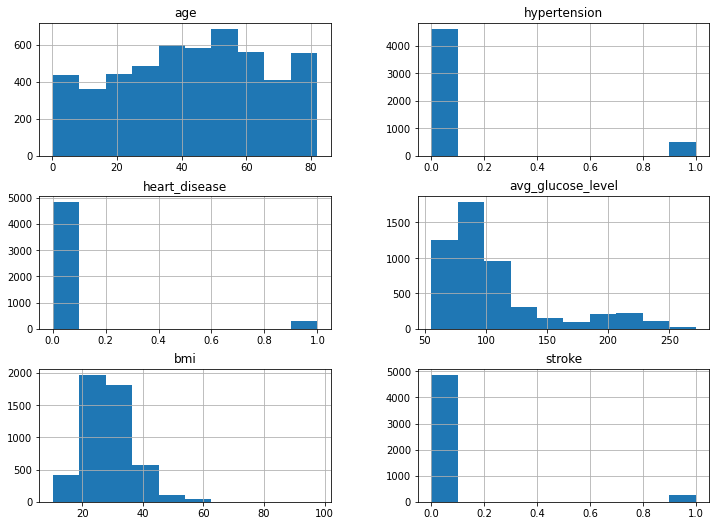

In [8]:
df.hist(figsize=(12,12), layout=(4,2),);

## Correlation Matrix

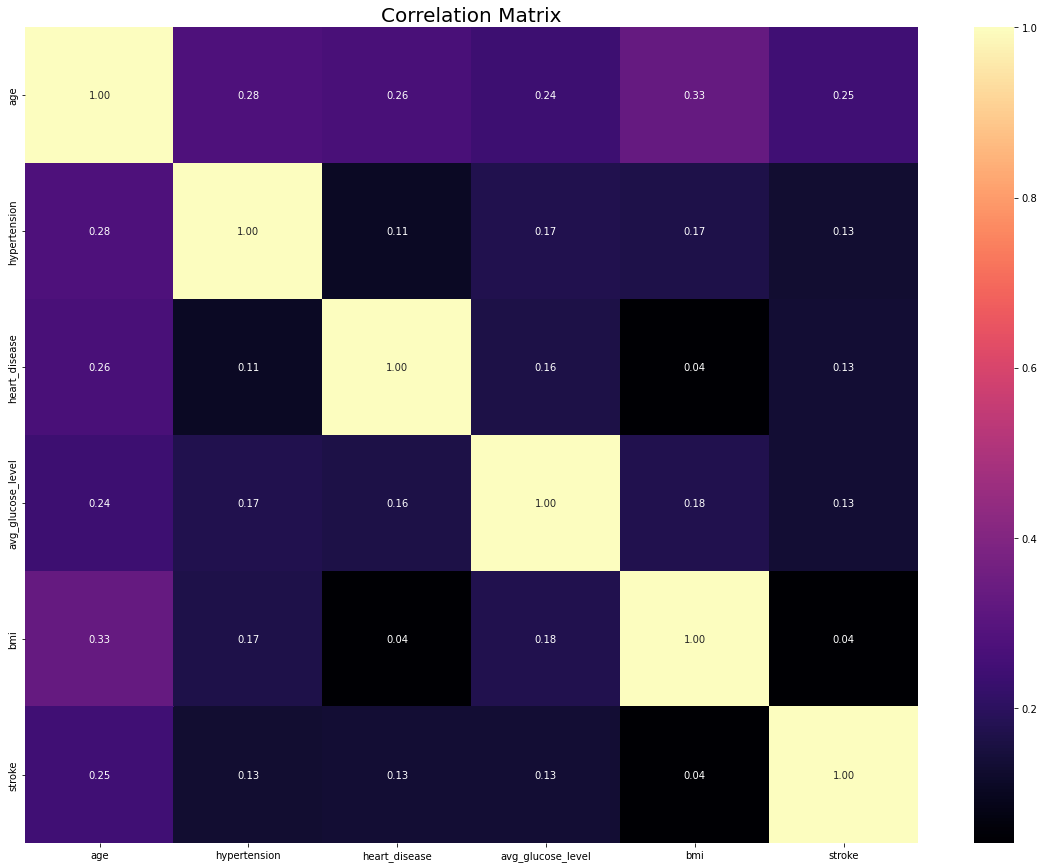

In [9]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

## Piplot

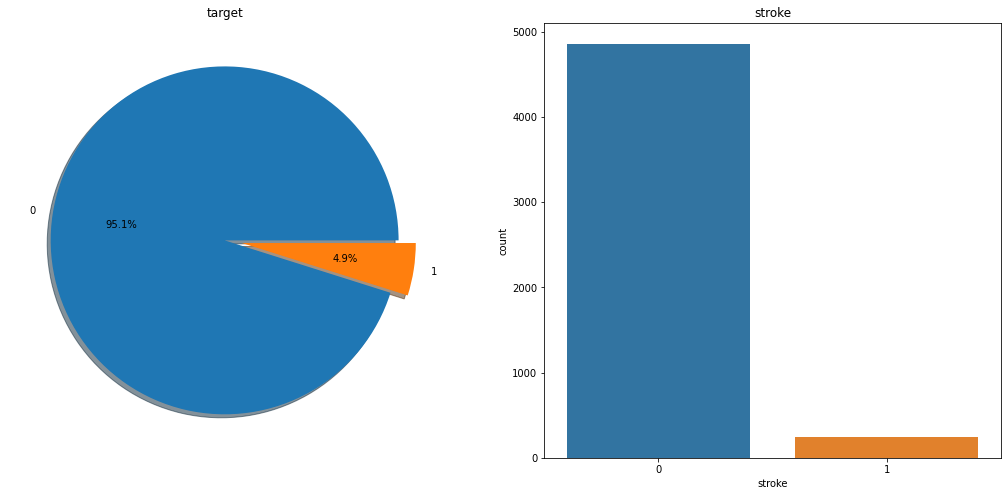

In [ ]:
# The distribution of the High income variable in the data examined and visualized.
f,ax=plt.subplots(1,2,figsize=(18,8))
df['stroke'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x='stroke',data=df,ax=ax[1])
ax[1].set_title('stroke')
plt.show()

# Null Value remove

In [12]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
df['bmi'] = df['bmi'].replace(0, df['bmi'].mean())

In [14]:
df.bmi.replace('', 0, inplace=False)

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [15]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [16]:
df['bmi'].replace('N/A', 'Test',inplace=True)

In [17]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [18]:
df['bmi']= df['bmi'].replace('nan', 'TEST')

In [19]:
df['bmi'].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

In [20]:
#nullvalue removal
df = df.dropna()

In [21]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [22]:
df.bmi

0       36.6
2       32.5
3       34.4
4       24.0
5       29.0
        ... 
5104    18.6
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 4909, dtype: float64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   int8   
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(2), int64(3), int8(1), object(5)
memory usage: 426.7+ KB


In [29]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3852
bmi                     6
smoking_status          4
stroke                  2
dtype: int64

In [30]:
df.smoking_status.value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

In [31]:
df.smoking_status.replace('Unknown', 'never smoked', inplace=True)

In [32]:
df.smoking_status.value_counts()

never smoked       3335
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

In [33]:
df.ever_married.replace('No',0,inplace=True)
df.ever_married.replace('Yes',1,inplace=True)

In [34]:
df.ever_married.value_counts()

1    3204
0    1705
Name: ever_married, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   int8   
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(2), int64(4), int8(1), object(4)
memory usage: 426.7+ KB


In [36]:
df["gender"] = df["gender"].astype('category')
df["work_type"] = df["work_type"].astype('category')
df["Residence_type"] = df["Residence_type"].astype('category')
df["smoking_status"] = df["smoking_status"].astype('category')
print(df.dtypes)

gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married            int64
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                      int8
smoking_status       category
stroke                  int64
dtype: object


# Encoding

In [37]:
#df["gender"] = df["gender"].cat.codes
df["work_type"] = df["work_type"].cat.codes
df["Residence_type"] = df["Residence_type"].cat.codes
df["smoking_status"] = df["smoking_status"].cat.codes

In [38]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,2,1,228.69,2,0,1
2,Male,80.0,0,1,1,2,0,105.92,1,1,1
3,Female,49.0,0,0,1,2,1,171.23,1,2,1
4,Female,79.0,1,0,1,3,0,174.12,0,1,1
5,Male,81.0,0,0,1,2,1,186.21,4,0,1


# Normalization


In [24]:
li = df["bmi"].to_list()

In [25]:
li = df["bmi"].to_list()
for i in range(0,len(li)):
    if li[i]<=18.5:
        li[i] = "Underweight"
    elif li[i] > 18.5 and li[i] <=24.9:
        li[i]= "Normal"
    elif li[i] > 24.9 and li[i] <=29.9:
        li[i]= "Overweight"
    elif li[i] > 29.9 and li[i] <=34.9:
        li[i]= "Obesity 1"
    elif li[i] > 34.9 and li[i] <=39.9:
        li[i]= "Obesity 2"
    elif li[i] > 39.9:
        li[i]= "Obesity 3"
df["bmi"]=li

In [26]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,Obesity 2,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,Obesity 1,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,Obesity 1,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,Normal,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,Overweight,formerly smoked,1


In [27]:
df["bmi"] = df["bmi"].astype('category')
df["bmi"] = df["bmi"].cat.codes

In [39]:
df["gender"] = df["gender"].astype('category')
df["gender"] = df["gender"].cat.codes

In [40]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,2,0,1
2,1,80.0,0,1,1,2,0,105.92,1,1,1
3,0,49.0,0,0,1,2,1,171.23,1,2,1
4,0,79.0,1,0,1,3,0,174.12,0,1,1
5,1,81.0,0,0,1,2,1,186.21,4,0,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int8   
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   int8   
 6   Residence_type     4909 non-null   int8   
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   int8   
 9   smoking_status     4909 non-null   int8   
 10  stroke             4909 non-null   int64  
dtypes: float64(2), int64(4), int8(5)
memory usage: 292.4 KB


In [42]:
y = df["stroke"]
X = df.drop(["stroke"], axis = 1)
cols = X.columns
index = X.index

In [43]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,2,0
2,1,80.0,0,1,1,2,0,105.92,1,1
3,0,49.0,0,0,1,2,1,171.23,1,2
4,0,79.0,1,0,1,3,0,174.12,0,1
5,1,81.0,0,0,1,2,1,186.21,4,0


In [44]:
y.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [45]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,2,0
2,1,80.0,0,1,1,2,0,105.92,1,1
3,0,49.0,0,0,1,2,1,171.23,1,2
4,0,79.0,1,0,1,3,0,174.12,0,1
5,1,81.0,0,0,1,2,1,186.21,4,0


In [46]:
y.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

# Spliting 70/30

In [47]:
y_train = y.iloc[0:3436]
y_test = y.iloc[3436:]
X_train = X.iloc[0:3436]
X_test = X.iloc[3436:]

# Model Creation


In [48]:
#import all models library
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
import keras
import sklearn
from matplotlib import pyplot as plt 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import numpy as np
import h5py
import os
import json
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [49]:
import sklearn
model = sklearn.ensemble.RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0    1.00000   0.99525   0.99762      1473
           1    0.00000   0.00000   0.00000         0

    accuracy                        0.99525      1473
   macro avg    0.50000   0.49762   0.49881      1473
weighted avg    1.00000   0.99525   0.99762      1473

0.9952477936184657
[[1466    7]
 [   0    0]]
Legitimate Transactions Detected (True Negatives):  1466
Legitimate Transactions Incorrectly Detected (False Positives):  7
Fraudulent Transactions Missed (False Negatives):  0
Fraudulent Transactions Detected (True Positives):  0
Total Fraudulent Transactions:  0
Sensitivy:  nan
Specificity:  0.9952477936184657
P0:  1.0
P1:  0.0


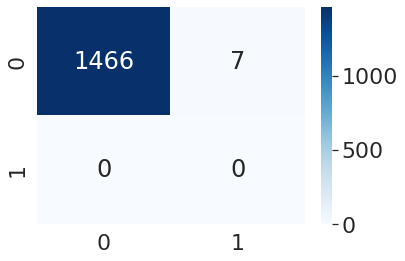

In [50]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred, digits=5))
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
print(cm)
print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
print('Total Fraudulent Transactions: ', np.sum(cm[1]))
print('Sensitivy: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))
print('P0: ',cm[0][0]/(cm[0][0]+cm[1][0]))
print('P1: ',cm[1][1]/(cm[1][1]+cm[0][1]))
y_true = ["0","1"]
#y_true=['Angry', 'Fear', 'Happy','Neutral','Sad']
data = cm
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
#df_cm.index.name = 'Actual'
#df_cm.columns.name = 'Predicted'
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 24}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)
plt.savefig('Cm.png', format='png', dpi=300)

In [51]:
import sklearn
model =  sklearn.tree.DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0    1.00000   0.94026   0.96921      1473
           1    0.00000   0.00000   0.00000         0

    accuracy                        0.94026      1473
   macro avg    0.50000   0.47013   0.48460      1473
weighted avg    1.00000   0.94026   0.96921      1473

0.9402579769178547
[[1385   88]
 [   0    0]]
Legitimate Transactions Detected (True Negatives):  1385
Legitimate Transactions Incorrectly Detected (False Positives):  88
Fraudulent Transactions Missed (False Negatives):  0
Fraudulent Transactions Detected (True Positives):  0
Total Fraudulent Transactions:  0
Sensitivy:  nan
Specificity:  0.9402579769178547
P0:  1.0
P1:  0.0


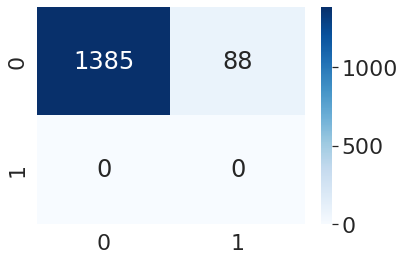

In [52]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred, digits=5))
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
print(cm)
print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
print('Total Fraudulent Transactions: ', np.sum(cm[1]))
print('Sensitivy: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))
print('P0: ',cm[0][0]/(cm[0][0]+cm[1][0]))
print('P1: ',cm[1][1]/(cm[1][1]+cm[0][1]))
y_true = ["0","1"]
#y_true=['Angry', 'Fear', 'Happy','Neutral','Sad']
data = cm
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
#df_cm.index.name = 'Actual'
#df_cm.columns.name = 'Predicted'
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 24}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)
plt.savefig('Cm.png', format='png', dpi=300)

In [53]:
import sklearn
model =  sklearn.naive_bayes.GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

              precision    recall  f1-score   support

           0    1.00000   0.90292   0.94898      1473
           1    0.00000   0.00000   0.00000         0

    accuracy                        0.90292      1473
   macro avg    0.50000   0.45146   0.47449      1473
weighted avg    1.00000   0.90292   0.94898      1473

0.902919212491514
[[1330  143]
 [   0    0]]
Legitimate Transactions Detected (True Negatives):  1330
Legitimate Transactions Incorrectly Detected (False Positives):  143
Fraudulent Transactions Missed (False Negatives):  0
Fraudulent Transactions Detected (True Positives):  0
Total Fraudulent Transactions:  0
Sensitivy:  nan
Specificity:  0.902919212491514
P0:  1.0
P1:  0.0


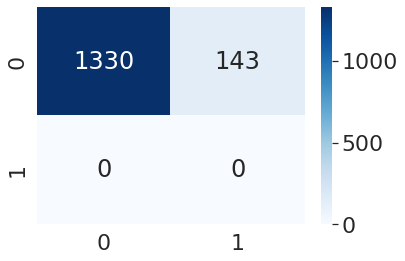

In [54]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred, digits=5))
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
print(cm)
print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
print('Total Fraudulent Transactions: ', np.sum(cm[1]))
print('Sensitivy: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))
print('P0: ',cm[0][0]/(cm[0][0]+cm[1][0]))
print('P1: ',cm[1][1]/(cm[1][1]+cm[0][1]))
y_true = ["0","1"]
#y_true=['Angry', 'Fear', 'Happy','Neutral','Sad']
data = cm
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
#df_cm.index.name = 'Actual'
#df_cm.columns.name = 'Predicted'
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 24}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)
plt.savefig('Cm.png', format='png', dpi=300)

In [55]:
import sklearn
model =  sklearn.tree.DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0    1.00000   0.94026   0.96921      1473
           1    0.00000   0.00000   0.00000         0

    accuracy                        0.94026      1473
   macro avg    0.50000   0.47013   0.48460      1473
weighted avg    1.00000   0.94026   0.96921      1473

0.9402579769178547
[[1385   88]
 [   0    0]]
Legitimate Transactions Detected (True Negatives):  1385
Legitimate Transactions Incorrectly Detected (False Positives):  88
Fraudulent Transactions Missed (False Negatives):  0
Fraudulent Transactions Detected (True Positives):  0
Total Fraudulent Transactions:  0
Sensitivy:  nan
Specificity:  0.9402579769178547
P0:  1.0
P1:  0.0


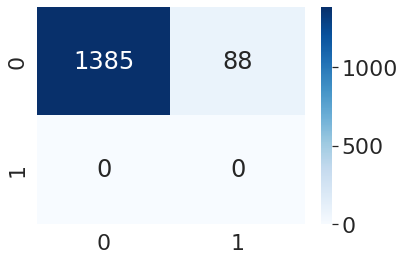

In [56]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred, digits=5))
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
print(cm)
print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
print('Total Fraudulent Transactions: ', np.sum(cm[1]))
print('Sensitivy: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))
print('P0: ',cm[0][0]/(cm[0][0]+cm[1][0]))
print('P1: ',cm[1][1]/(cm[1][1]+cm[0][1]))
y_true = ["0","1"]
#y_true=['Angry', 'Fear', 'Happy','Neutral','Sad']
data = cm
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
#df_cm.index.name = 'Actual'
#df_cm.columns.name = 'Predicted'
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 24}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)
plt.savefig('Cm.png', format='png', dpi=300)

In [57]:
import sklearn
model =  sklearn.tree.DecisionTreeClassifier(splitter='best')
model.fit(X_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0    1.00000   0.94229   0.97029      1473
           1    0.00000   0.00000   0.00000         0

    accuracy                        0.94229      1473
   macro avg    0.50000   0.47115   0.48515      1473
weighted avg    1.00000   0.94229   0.97029      1473

0.9422946367956552
[[1388   85]
 [   0    0]]
Legitimate Transactions Detected (True Negatives):  1388
Legitimate Transactions Incorrectly Detected (False Positives):  85
Fraudulent Transactions Missed (False Negatives):  0
Fraudulent Transactions Detected (True Positives):  0
Total Fraudulent Transactions:  0
Sensitivy:  nan
Specificity:  0.9422946367956552
P0:  1.0
P1:  0.0


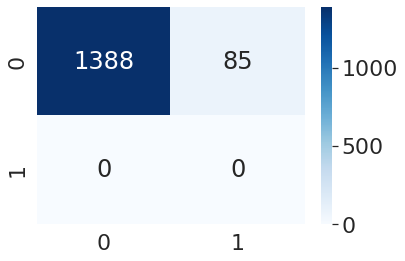

In [58]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred, digits=5))
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
print(cm)
print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
print('Total Fraudulent Transactions: ', np.sum(cm[1]))
print('Sensitivy: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))
print('P0: ',cm[0][0]/(cm[0][0]+cm[1][0]))
print('P1: ',cm[1][1]/(cm[1][1]+cm[0][1]))
y_true = ["0","1"]
#y_true=['Angry', 'Fear', 'Happy','Neutral','Sad']
data = cm
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
#df_cm.index.name = 'Actual'
#df_cm.columns.name = 'Predicted'
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 24}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)

plt.savefig('Cm.png', format='png', dpi=300)

In [61]:
import sklearn
models = []

models.append(('RF', sklearn.ensemble.RandomForestClassifier()))
models.append(('XGB', GradientBoostingClassifier()))
models.append(("LightGBM", LGBMClassifier()))
models.append(("DT",sklearn.tree.DecisionTreeClassifier()))
models.append(("LR",sklearn.linear_model.LogisticRegression()))
# evaluate each model in turn
results = []
names = []

# Comparison Boxchart for all models accuracy

RF: 0.956407 (0.002074)
XGB: 0.954981 (0.001911)
LightGBM: 0.951924 (0.002774)
DT: 0.918108 (0.008098)
LR: 0.957425 (0.001083)


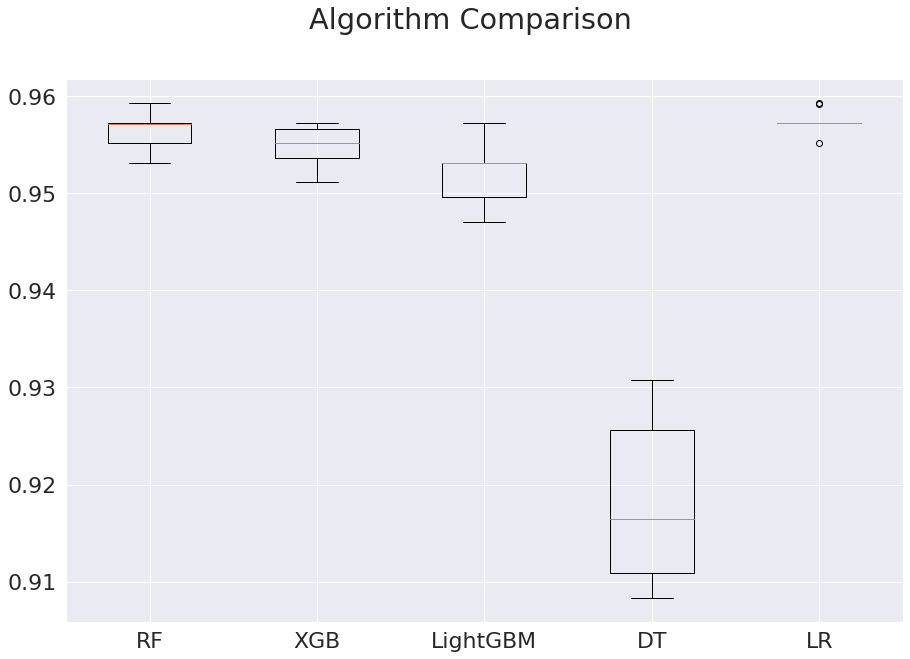

In [60]:
for name, model in models:
    
        kfold = KFold(n_splits = 10)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Reports
So in this mini-project, we saw some of the factors that might result in strokes. Where Age was highly correlated followed by hypertension, heart disease, avg glucose level, and ever married.

RandomForestClassifier was a knight who performed well. There are outliers in some variable, reason behind why I kept it as it is because these things are either depends on other factors and there are possibilities of having such kind of records. For example, BMI can be high and still no stroke as a person is young or he does not have any heart disease.
**Accuracy(0.99)**